# Data

In [338]:
import ast
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [339]:
# USDC: baseCurrency:  "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"
# USDT: baseCurrency:  "0xdac17f958d2ee523a2206206994597c13d831ec7"
# quoteCurrency:  "0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"

# A simple function to use requests.post to make the API call.
def run_query(query):  
    headers = {'X-API-KEY': 'BQYjLXSsm32NnV6FM4eudu9xYt2L3AsW'}
    request = requests.post('https://graphql.bitquery.io/',
                            json={'query': query}, headers=headers)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed and return code is {}.      {}'.format(request.status_code,
                        query))

# The GraphQL query
query = """
query
{
  ethereum(network: ethereum) {
    dexTrades(
      options: {limit: 100000, asc: "timeInterval.minute"}
      date: {since: "2021-04-21"}
      exchangeName: {is: "Uniswap"}
      baseCurrency: {is: "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"}
      quoteCurrency: {is: "0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"}
    ) {
      timeInterval {
        minute(count: 5)
      }
      baseCurrency {
        symbol
        address
      }
      baseAmount
      quoteCurrency {
        symbol
        address
      }
      quoteAmount
      trades: count
      quotePrice
      maximum_price: quotePrice(calculate: maximum)
      minimum_price: quotePrice(calculate: minimum)
      open_price: minimum(of: block, get: quote_price)
      close_price: maximum(of: block, get: quote_price)
    }
  }
}

"""
# Execute the query
result = run_query(query)  

#Build dataframe
data=pd.DataFrame(result['data']['ethereum']['dexTrades'])

#Data Cleaning, Feature Engineering
data= data.dropna()

time=[]
for x in range(0, data.shape[0]):
    time.append(data['timeInterval'].iloc[x]['minute'])  
data['timeInterval']= time

data['close_price']= data['close_price'].apply(lambda x: float(x))
data=data.set_index('timeInterval')
data.index=pd.to_datetime(data.index)
print(data.shape)
data.tail(2)

(9556, 10)


,baseCurrency,baseAmount,quoteCurrency,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price
timeInterval,,,,,,,,,,
2021-05-24 04:20:00,"{'symbol': 'USDC', 'address': '0xa0b86991c6218...",115658.025582,"{'symbol': 'WETH', 'address': '0xc02aaa39b223f...",53.979815,19,0.000467,0.000469,0.000466,0.0004658390582072352,0.000468
2021-05-24 04:25:00,"{'symbol': 'USDC', 'address': '0xa0b86991c6218...",44729.475074,"{'symbol': 'WETH', 'address': '0xc02aaa39b223f...",20.950609,5,0.000468,0.000469,0.000466,0.00046867726820621274,0.000469


# Finding Optimal SMA Non-Bollinger Bands

In [390]:
# Standard SMA Bollinger Bands (window=20, no_of_std=2)     
SMA_1= data['close_price'].rolling(window=20).mean()
STD_1= data['close_price'].rolling(window=20).std()    


# SMA Non-Bollinger Bands- GammaStrategies (window=20, no_of_std=1.96 )
SMA_2= data['close_price'].rolling(window=20).mean()
MAE_2 =mean_absolute_error(data['close_price'][20:], SMA_2[20:])
STD_2= np.std(data['close_price'][20:] - data['close_price'].rolling(window=20).mean()[20:])  # output number, instead of np.std


# SMA Non-Bollinger Bands (window=10, no_of_std=2)
SMA_3= data['close_price'].rolling(window=10).mean()
STD_3= data['close_price'].rolling(window=10).std()


# SMA Non-Bollinger Bands (window=10, no_of_std=1.9)
SMA_4= data['close_price'].rolling(window=10).mean()
STD_4= data['close_price'].rolling(window=10).std()  

# SMA Non-Bollinger Bands (window=10, no_of_std=1.8)            
SMA_5= data['close_price'].rolling(window=10).mean()
STD_5= data['close_price'].rolling(window=10).std()

# SMA Non-Bollinger Bands (window=10, no_of_std=1.5)
SMA_6= data['close_price'].rolling(window=10).mean()
STD_6= data['close_price'].rolling(window=10).std()

# SMA Non-Bollinger Bands (window=5, no_of_std=2)
SMA_7= data['close_price'].rolling(window=5).mean()
STD_7= data['close_price'].rolling(window=5).std()

# SMA Non-Bollinger Bands (window=5, no_of_std=1.7)
SMA_8= data['close_price'].rolling(window=5).mean()
STD_8= data['close_price'].rolling(window=5).std()

# SMA Non-Bollinger Bands (window=5, no_of_std=1.6)          
SMA_9= data['close_price'].rolling(window=5).mean()
STD_9= data['close_price'].rolling(window=5).std()

# SMA Non-Bollinger Bands (window=5, no_of_std=1.5)
SMA_10= data['close_price'].rolling(window=5).mean()
STD_10= data['close_price'].rolling(window=5).std()

# SMA Non-Bollinger Bands (window=2, no_of_std=1.8)             
SMA_11= data['close_price'].rolling(window=2).mean()
STD_11= data['close_price'].rolling(window=2).std()

# SMA Non-Bollinger Bands (window=2, no_of_std=0.8)  
SMA_12= data['close_price'].rolling(window=2).mean()
STD_12= data['close_price'].rolling(window=2).std()


SMA_compare=pd.DataFrame({'close_price':data['close_price'],
                      'neutral_lower_1':(SMA_1 - 2  *STD_1),'neutral_upper_1':(SMA_1 + 2 * STD_1), 
                      'neutral_lower_2': (SMA_2 - MAE_2 - 1.96 * STD_2),'neutral_upper_2': (SMA_2 + MAE_2 + 1.96 * STD_2),
                      'neutral_lower_3': (SMA_3 - 2 * STD_3),'neutral_upper_3': (SMA_3 + 2 * STD_3),
                      'neutral_lower_4': (SMA_4 - 1.9 * STD_4),'neutral_upper_4': (SMA_4 + 1.9 * STD_4),
                      'neutral_lower_5': (SMA_5 - 1.8 * STD_5),'neutral_upper_5': (SMA_5 + 1.8 * STD_5),
                      'neutral_lower_6': (SMA_6 - 1.5 * STD_6),'neutral_upper_6': (SMA_6 + 1.5 * STD_6),
                      'neutral_lower_7': (SMA_7 - 2 * STD_7),'neutral_upper_7': (SMA_7 + 2 * STD_7),
                      'neutral_lower_8': (SMA_8 - 1.7 * STD_8),'neutral_upper_8': (SMA_8 + 1.7 * STD_8),
                      'neutral_lower_9': (SMA_9 - 1.6 * STD_9),'neutral_upper_9': (SMA_9 + 1.6 * STD_9),
                      'neutral_lower_10': (SMA_10 - 1.5 * STD_10),'neutral_upper_10': (SMA_10 + 1.5 * STD_10),
                      'neutral_lower_11': (SMA_11 - 1.8 * STD_11),'neutral_upper_11': (SMA_11 + 1.8 * STD_11),
                      'neutral_lower_12': (SMA_12 - 0.8 * STD_12),'neutral_upper_12': (SMA_12 + 0.8 * STD_12)})

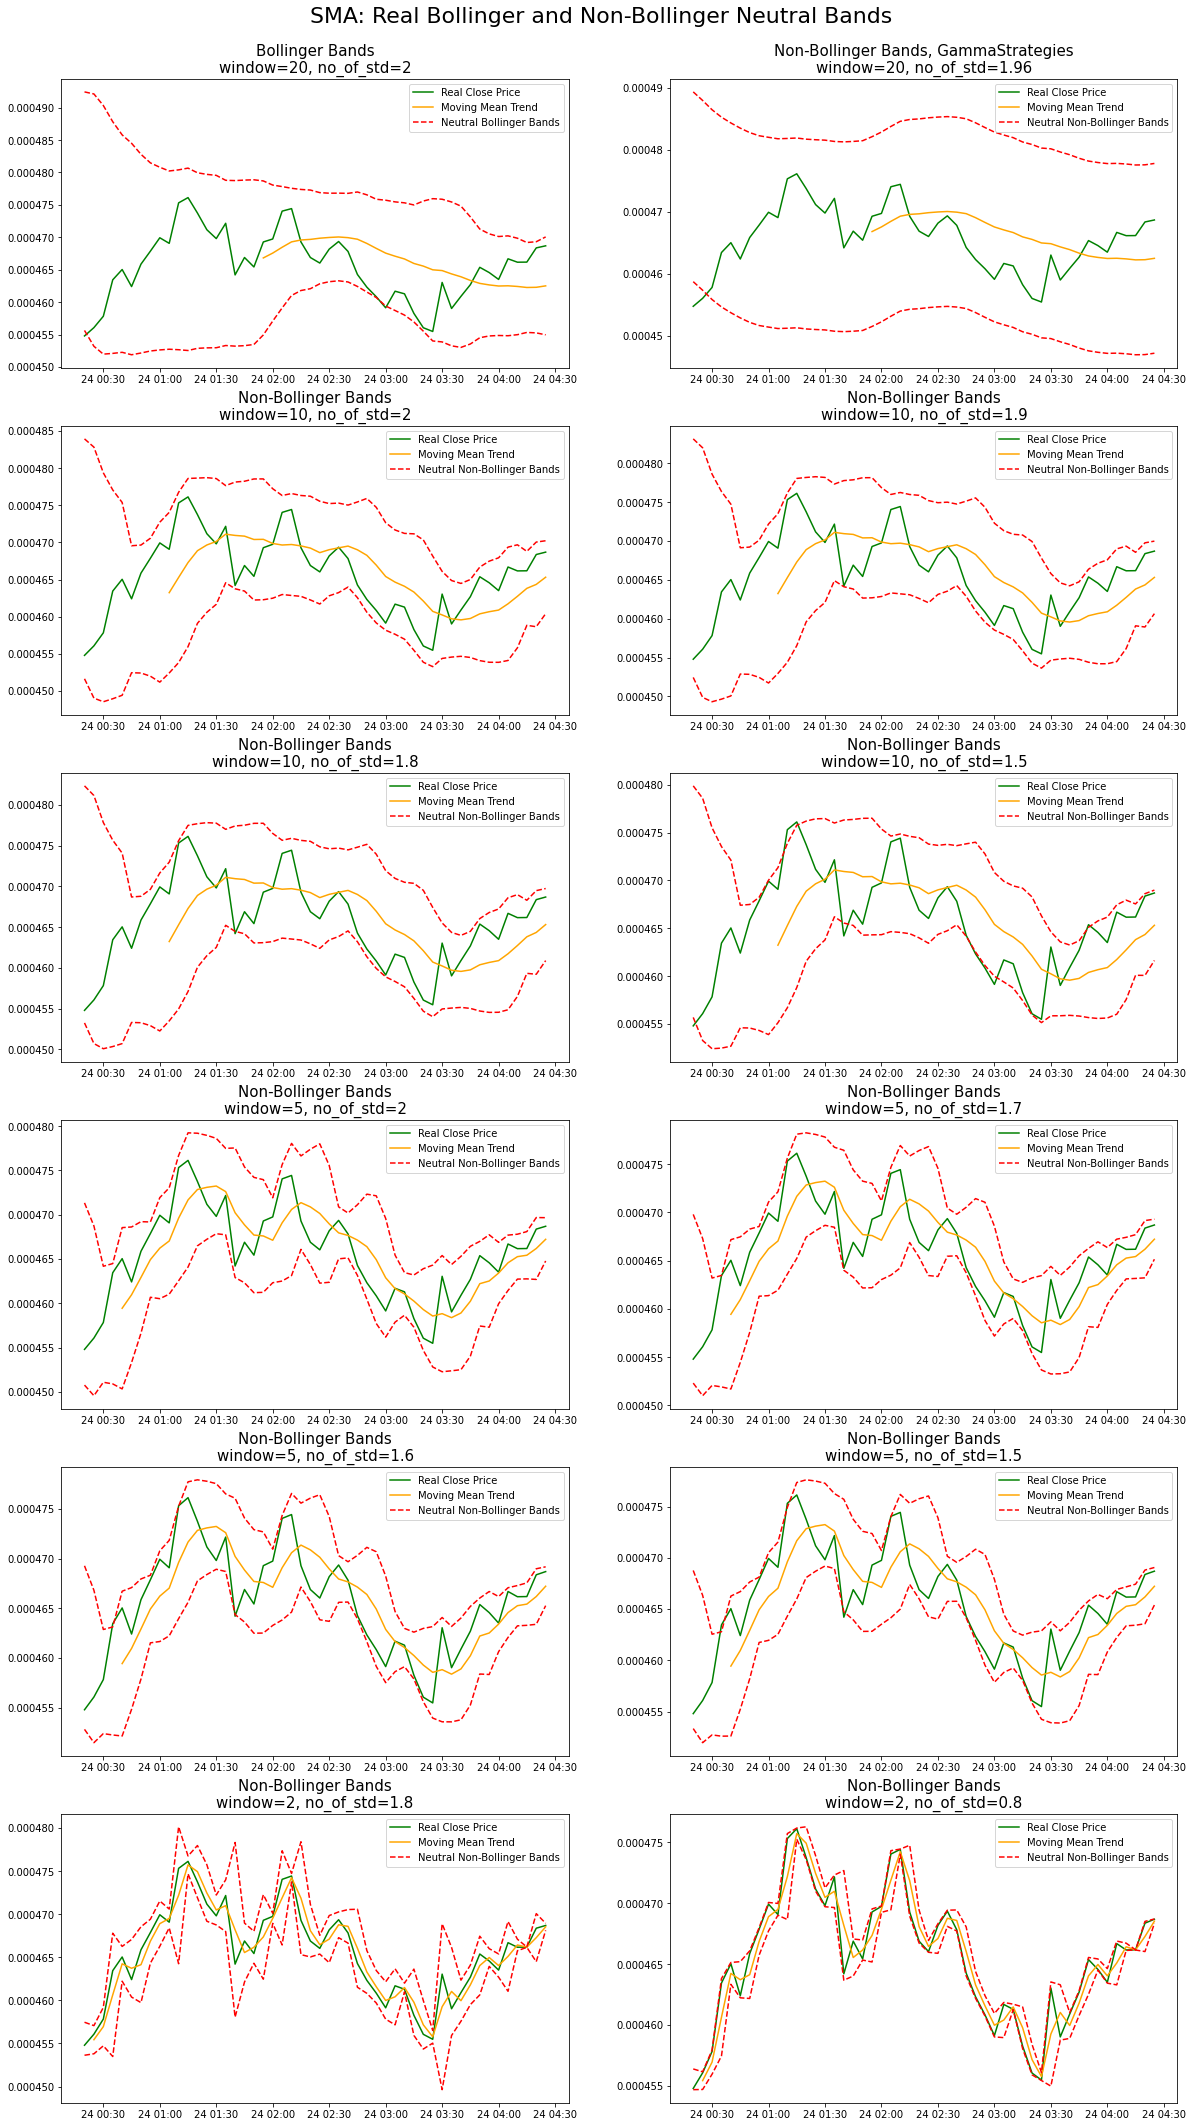

In [391]:
SMA_test=SMA_compare.copy()[-50:]
plt.figure(figsize=(20,50))

plt.subplot(8,2,1)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=20).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_1'], "r--", label="Neutral Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_1'], "r--")
plt.legend(loc= 'upper right')
plt.title('Bollinger Bands\nwindow=20, no_of_std=2', fontsize=15)


plt.subplot(8,2,2)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=20).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_2'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_2'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands, GammaStrategies\nwindow=20, no_of_std=1.96', fontsize=15)

plt.subplot(8,2,3)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=10).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_3'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_3'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nwindow=10, no_of_std=2', fontsize=15)

plt.subplot(8,2,4)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=10).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_4'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_4'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nwindow=10, no_of_std=1.9', fontsize=15)

plt.subplot(8,2,5)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=10).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_5'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_5'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nwindow=10, no_of_std=1.8', fontsize=15)

plt.subplot(8,2,6)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=10).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_6'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_6'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nwindow=10, no_of_std=1.5', fontsize=15)

plt.subplot(8,2,7)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=5).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_7'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_7'], "r--")
plt.legend(loc='upper right')
plt.title('Non-Bollinger Bands\nwindow=5, no_of_std=2', fontsize=15)

plt.subplot(8,2,8)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=5).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_8'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_8'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nwindow=5, no_of_std=1.7', fontsize=15)

plt.subplot(8,2,9)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=5).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_9'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_9'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nwindow=5, no_of_std=1.6', fontsize=15)

plt.subplot(8,2,10)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=5).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_10'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_10'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nwindow=5, no_of_std=1.5', fontsize=15)

plt.subplot(8,2,11)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=2).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_11'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_11'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nwindow=2, no_of_std=1.8', fontsize=15)

plt.subplot(8,2,12)
plt.plot(SMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(SMA_test['close_price'].rolling(window=2).mean(), label="Moving Mean Trend", color='orange')
plt.plot(SMA_test['neutral_lower_12'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(SMA_test['neutral_upper_12'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nwindow=2, no_of_std=0.8', fontsize=15)

plt.suptitle('SMA: Real Bollinger and Non-Bollinger Neutral Bands',y=0.90,fontsize=22)
plt.show()

# Prediction of SMA Bollinger Bands (window=20, no_of_std=2)

In [342]:
def getSMABollingerBands (df):    
    # Calculate SMA & std (window=20, no_of_std=2)
    SMA= df['close_price'].rolling(window=20).mean()
    std= df['close_price'].rolling(window=20).std()
    
    # Calculate the upper and lower Bearish Bollinger Bands
    df['bearish_lower'] = (SMA - 1.5* 2 * std).abs()
    df['bearish_upper'] = SMA +  2 * std  
    # Calculate the upper and lower Neutral Bollinger Bands
    df['neutral_lower'] = (SMA - 2 * std).abs()
    df['neutral_upper'] = SMA + 2 * std
    # Calculate the upper and lower Bullish Bollinger Bands
    df['bullish_lower'] = (SMA - 2 * std).abs()
    df['bullish_upper'] = SMA + 1.5 * 2 * std
    
    df.dropna(inplace=True)
    
    df=df[['close_price','bearish_lower','bearish_upper','neutral_lower','neutral_upper','bullish_lower', 'bullish_upper']]
    return df

copied_data=data.copy()
data_bands=getSMABollingerBands (copied_data)


def train_test_split(df, test_size):
    split = df.shape[0] - int(test_size * df.shape[0])
    train_set = df.iloc[:split]
    test_set = df.iloc[split:]
    return train_set, test_set

train_set, test_set = train_test_split(data_bands, 0.3)


def zero_scaling(df):   
    return df / df.iloc[0] - 1


def sliding_window(df, len_window, zero):   
    window = []
    for a in range(df.shape[0] - len_window):
        sub = df[a: (a + len_window)].copy()
        if zero:
            sub = zero_scaling(sub)
        window.append(sub.values)
    return np.array(window)


def prepare_data(column, len_window, zero):     
    train_data = train_set[[column]]
    test_data = test_set[[column]]  
    
    X_train = sliding_window(train_data, len_window, zero)  
    X_test = sliding_window(test_data, len_window, zero) 
    
    y_train = train_data[column][len_window:].values
    y_test = test_data[column][len_window:].values
    
    if zero:
        y_train = y_train / train_data[column][:-len_window].values - 1
        y_test = y_test / test_data[column][:-len_window].values - 1
        
    return train_data,  test_data, X_train, X_test,  y_train, y_test


data_final_SMA_Bollinger= test_set.copy()

for col in test_set.columns:
    train_data,  test_data, X_train, X_test,  y_train, y_test = prepare_data(column=col, len_window=5, zero=True)
    
    model = Sequential()
    model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])) )  
    model.add(Dropout(0.2))
    model.add(Dense(units=1 ))  # tedade noroun ha
    model.add(Activation('linear'))  #activation ra besoorate layer joda add konim natije behtar ast
    model.compile(loss='mse', optimizer='adam') 
    
    model.fit(X_train,y_train,epochs=30,batch_size=32, verbose=1) 
    
    prediction=model.predict(X_test).squeeze()
    
    predicted= pd.DataFrame(data=(prediction + 1) * (test_data[col][:-5].values) ,  index=test_data[5:].index ,columns=['predicted_'+col] )            

    data_final_SMA_Bollinger= data_final_SMA_Bollinger.join(predicted)

data_final_SMA_Bollinger;

Epoch 1/30
209/209 [==============================] - 3s 6ms/step - loss: 7.6711e-05
Epoch 2/30
209/209 [==============================] - 1s 6ms/step - loss: 3.3118e-05
Epoch 3/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9630e-05
Epoch 4/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9545e-05
Epoch 5/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9542e-05
Epoch 6/30
209/209 [==============================] - 1s 6ms/step - loss: 2.6720e-05
Epoch 7/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9188e-05
Epoch 8/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9100e-05
Epoch 9/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9265e-05
Epoch 10/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9465e-05
Epoch 11/30
209/209 [==============================] - 1s 6ms/step - loss: 2.8872e-05
Epoch 12/30
209/209 [==============================] - 1s 6ms/s

209/209 [==============================] - 1s 6ms/step - loss: 3.7784e-06
Epoch 12/30
209/209 [==============================] - 1s 6ms/step - loss: 3.3429e-06
Epoch 13/30
209/209 [==============================] - 1s 7ms/step - loss: 3.1971e-06
Epoch 14/30
209/209 [==============================] - 1s 6ms/step - loss: 3.2360e-06A: 0s
Epoch 15/30
209/209 [==============================] - 1s 6ms/step - loss: 3.0574e-06
Epoch 16/30
209/209 [==============================] - 1s 7ms/step - loss: 2.9052e-06
Epoch 17/30
209/209 [==============================] - 1s 6ms/step - loss: 3.1914e-06
Epoch 18/30
209/209 [==============================] - 1s 6ms/step - loss: 2.8820e-06
Epoch 19/30
209/209 [==============================] - 1s 6ms/step - loss: 2.8884e-06
Epoch 20/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9797e-06
Epoch 21/30
209/209 [==============================] - 1s 6ms/step - loss: 2.8506e-06A: 0s - lo
Epoch 22/30
209/209 [==============================

# Prediction of SMA Optimal NonBollinger Bands (window=2, no_of_std=1.8)

In [392]:
def getSMABollingerBands (df):    
    # Calculate SMA & std (window=2, no_of_std=1.8)
    SMA= df['close_price'].rolling(window=2).mean()
    std= df['close_price'].rolling(window=2).std()
    
    # Calculate the upper and lower Bearish Bollinger Bands
    df['bearish_lower'] = (SMA - 1.5* 1.8 * std).abs()
    df['bearish_upper'] = SMA +  1.8 * std  
    # Calculate the upper and lower Neutral Bollinger Bands
    df['neutral_lower'] = (SMA - 1.8 * std).abs()
    df['neutral_upper'] = SMA + 1.8 * std
    # Calculate the upper and lower Bullish Bollinger Bands
    df['bullish_lower'] = (SMA - 1.8 * std).abs()
    df['bullish_upper'] = SMA + 1.5 * 1.8 * std
    
    df.dropna(inplace=True)
    
    df=df[['close_price','bearish_lower','bearish_upper','neutral_lower','neutral_upper','bullish_lower', 'bullish_upper']]
    return df

copied_data=data.copy()
data_bands=getSMABollingerBands (copied_data)


def train_test_split(df, test_size):
    split = df.shape[0] - int(test_size * df.shape[0])
    train_set = df.iloc[:split]
    test_set = df.iloc[split:]
    return train_set, test_set

train_set, test_set = train_test_split(data_bands, 0.3)


def zero_scaling(df):   
    return df / df.iloc[0] - 1


def sliding_window(df, len_window, zero):   
    window = []
    for a in range(df.shape[0] - len_window):
        sub = df[a: (a + len_window)].copy()
        if zero:
            sub = zero_scaling(sub)
        window.append(sub.values)
    return np.array(window)


def prepare_data(column, len_window, zero):     
    train_data = train_set[[column]]
    test_data = test_set[[column]]  
    
    X_train = sliding_window(train_data, len_window, zero)  
    X_test = sliding_window(test_data, len_window, zero) 
    
    y_train = train_data[column][len_window:].values
    y_test = test_data[column][len_window:].values
    
    if zero:
        y_train = y_train / train_data[column][:-len_window].values - 1
        y_test = y_test / test_data[column][:-len_window].values - 1
        
    return train_data,  test_data, X_train, X_test,  y_train, y_test


data_final_SMA_Non_Bollinger= test_set.copy()

for col in test_set.columns:
    train_data,  test_data, X_train, X_test,  y_train, y_test = prepare_data(column=col, len_window=5, zero=True)
    
    model = Sequential()
    model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])) )  
    model.add(Dropout(0.2))
    model.add(Dense(units=1 ))  # tedade noroun ha
    model.add(Activation('linear'))  #activation ra besoorate layer joda add konim natije behtar ast
    model.compile(loss='mse', optimizer='adam') 
    
    model.fit(X_train,y_train,epochs=30,batch_size=32, verbose=1) 
    
    prediction=model.predict(X_test).squeeze()
    
    predicted= pd.DataFrame(data=(prediction + 1) * (test_data[col][:-5].values) ,  index=test_data[5:].index ,columns=['predicted_'+col] )            

    data_final_SMA_Non_Bollinger= data_final_SMA_Non_Bollinger.join(predicted)

data_final_SMA_Non_Bollinger;

Epoch 1/30
209/209 [==============================] - 2s 5ms/step - loss: 7.8480e-05
Epoch 2/30
209/209 [==============================] - 1s 5ms/step - loss: 3.1206e-05
Epoch 3/30
209/209 [==============================] - 1s 5ms/step - loss: 2.8667e-05
Epoch 4/30
209/209 [==============================] - 1s 5ms/step - loss: 2.8933e-05
Epoch 5/30
209/209 [==============================] - 1s 5ms/step - loss: 2.9838e-05
Epoch 6/30
209/209 [==============================] - 1s 5ms/step - loss: 2.7285e-05
Epoch 7/30
209/209 [==============================] - 1s 5ms/step - loss: 2.8040e-05
Epoch 8/30
209/209 [==============================] - 1s 4ms/step - loss: 2.8785e-05
Epoch 9/30
209/209 [==============================] - 1s 5ms/step - loss: 2.7852e-05
Epoch 10/30
209/209 [==============================] - 1s 5ms/step - loss: 2.6749e-05
Epoch 11/30
209/209 [==============================] - 1s 4ms/step - loss: 2.9489e-05
Epoch 12/30
209/209 [==============================] - 1s 4ms/s

209/209 [==============================] - 1s 4ms/step - loss: 8.2057e-05
Epoch 12/30
209/209 [==============================] - 1s 5ms/step - loss: 7.8538e-05
Epoch 13/30
209/209 [==============================] - 1s 5ms/step - loss: 8.3137e-05
Epoch 14/30
209/209 [==============================] - 1s 5ms/step - loss: 7.9954e-05
Epoch 15/30
209/209 [==============================] - 1s 6ms/step - loss: 7.7907e-05
Epoch 16/30
209/209 [==============================] - 1s 6ms/step - loss: 8.0409e-05
Epoch 17/30
209/209 [==============================] - 1s 6ms/step - loss: 7.8602e-05
Epoch 18/30
209/209 [==============================] - 1s 6ms/step - loss: 7.4663e-05
Epoch 19/30
209/209 [==============================] - 1s 5ms/step - loss: 7.6382e-05
Epoch 20/30
209/209 [==============================] - 1s 6ms/step - loss: 7.8314e-05
Epoch 21/30
209/209 [==============================] - 1s 6ms/step - loss: 7.8786e-05
Epoch 22/30
209/209 [==============================] - 1s 6ms/step

# Comparing the Predictions of SMA Bollinger (window=20, no_of_std=2) & Optimal Non-Bollinger (window=2, no_of_std=1.8) Bands

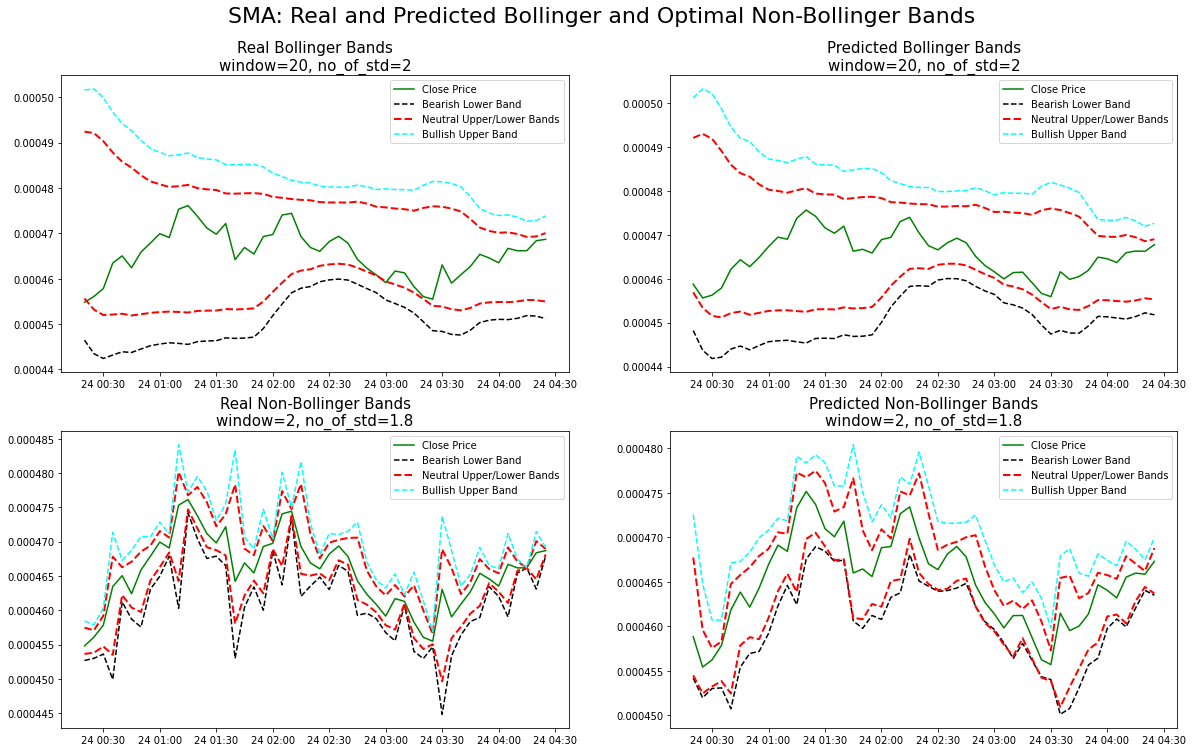

In [393]:
plt.figure(figsize=(20,12))

#SMA, Bollinger
test_SMA_Bollinger=data_final_SMA_Bollinger[-50:]
#Real
plt.subplot(2,2,1)
plt.plot(test_SMA_Bollinger['close_price'], label="Close Price", color='g')
plt.plot(test_SMA_Bollinger['bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_SMA_Bollinger['neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_SMA_Bollinger['neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r',lw=2)
plt.plot(test_SMA_Bollinger['bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend(loc= 'upper right')
plt.title('Real Bollinger Bands\nwindow=20, no_of_std=2', fontsize=15)
#Predicted
plt.subplot(2,2,2)
plt.plot(test_SMA_Bollinger['predicted_close_price'], label="Close Price", color='g' )
plt.plot(test_SMA_Bollinger['predicted_bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_SMA_Bollinger['predicted_neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_SMA_Bollinger['predicted_neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r', lw=2)
plt.plot(test_SMA_Bollinger['predicted_bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend(loc= 'upper right')
plt.title('Predicted Bollinger Bands\nwindow=20, no_of_std=2', fontsize=15)

#SMA, Non-Bollinger
test_SMA_Non_Bollinger=data_final_SMA_Non_Bollinger[-50:]
#Real
plt.subplot(2,2,3)
plt.plot(test_SMA_Non_Bollinger['close_price'], label="Close Price", color='g')
plt.plot(test_SMA_Non_Bollinger['bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_SMA_Non_Bollinger['neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_SMA_Non_Bollinger['neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r',lw=2)
plt.plot(test_SMA_Non_Bollinger['bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend(loc= 'upper right')
plt.title('Real Non-Bollinger Bands\nwindow=2, no_of_std=1.8', fontsize=15)
#Predicted
plt.subplot(2,2,4)
plt.plot(test_SMA_Non_Bollinger['predicted_close_price'], label="Close Price", color='g' )
plt.plot(test_SMA_Non_Bollinger['predicted_bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_SMA_Non_Bollinger['predicted_neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_SMA_Non_Bollinger['predicted_neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r', lw=2)
plt.plot(test_SMA_Non_Bollinger['predicted_bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend(loc= 'upper right')
plt.title('Predicted Non-Bollinger Bands\nwindow=2, no_of_std=1.8', fontsize=15)
plt.suptitle('SMA: Real and Predicted Bollinger and Optimal Non-Bollinger Bands',y=0.96,fontsize=22)

plt.show()

# EMA

# Finding Optimal EMA Non-Bollinger Bands

In [386]:
# Standard EMA Bollinger Bands (span=20, no_of_std=2)          
EMA_1= data['close_price'].ewm(span=20).mean()
STD_1= data['close_price'].ewm(span=20).std()    


# Non-Bollinger Bands- GammaStrategies (span=20, no_of_std=1.96 )
EMA_2= data['close_price'].ewm(span=20).mean()
MAE_2 =mean_absolute_error(data['close_price'][20:], EMA_2[20:])
STD_2= np.std(data['close_price'][20:] - data['close_price'].ewm(span=20).mean()[20:])  # output number, instead of np.std


# Non-Bollinger Bands (span=10, no_of_std=2)
EMA_3= data['close_price'].ewm(span=10).mean()
STD_3= data['close_price'].ewm(span=10).std()


# Non-Bollinger Bands (span=10, no_of_std=1.9)
EMA_4= data['close_price'].ewm(span=10).mean()
STD_4= data['close_price'].ewm(span=10).std()

# Non-Bollinger Bands (span=10, no_of_std=1.8)              
EMA_5= data['close_price'].ewm(span=10).mean()
STD_5= data['close_price'].ewm(span=10).std()

# Non-Bollinger Bands (span=10, no_of_std=1.5)
EMA_6= data['close_price'].ewm(span=10).mean()
STD_6= data['close_price'].ewm(span=10).std()

# Non-Bollinger Bands (span=5, no_of_std=2)
EMA_7= data['close_price'].ewm(span=5).mean()
STD_7= data['close_price'].ewm(span=5).std()

# Non-Bollinger Bands (span=5, no_of_std=1.7)
EMA_8= data['close_price'].ewm(span=5).mean()
STD_8= data['close_price'].ewm(span=5).std()

# Non-Bollinger Bands (span=5, no_of_std=1.6)              
EMA_9= data['close_price'].ewm(span=5).mean()
STD_9= data['close_price'].ewm(span=5).std()

# Non-Bollinger Bands (span=5, no_of_std=1.5)
EMA_10= data['close_price'].ewm(span=5).mean()
STD_10= data['close_price'].ewm(span=5).std()

# Non-Bollinger Bands (span=2, no_of_std=1.5)              
EMA_11= data['close_price'].ewm(span=2).mean()
STD_11= data['close_price'].ewm(span=2).std()

# Non-Bollinger Bands (span=2, no_of_std=0.9)    
EMA_12= data['close_price'].ewm(span=2).mean()
STD_12= data['close_price'].ewm(span=2).std()

EMA_compare=pd.DataFrame({'close_price':data['close_price'],
                      'neutral_lower_1':(EMA_1 - 2  *STD_1),'neutral_upper_1':(EMA_1 + 2 * STD_1), 
                      'neutral_lower_2': (EMA_2 - MAE_2 - 1.96 * STD_2),'neutral_upper_2': (EMA_2 + MAE_2 + 1.96 * STD_2),
                      'neutral_lower_3': (EMA_3 - 2 * STD_3),'neutral_upper_3': (EMA_3 + 2 * STD_3),
                      'neutral_lower_4': (EMA_4 - 1.9 * STD_4),'neutral_upper_4': (EMA_4 + 1.9 * STD_4),
                      'neutral_lower_5': (EMA_5 - 1.8 * STD_5),'neutral_upper_5': (EMA_5 + 1.8 * STD_5),
                      'neutral_lower_6': (EMA_6 - 1.5 * STD_6),'neutral_upper_6': (EMA_6 + 1.5 * STD_6),
                      'neutral_lower_7': (EMA_7 - 2 * STD_7),'neutral_upper_7': (EMA_7 + 2 * STD_7),
                      'neutral_lower_8': (EMA_8 - 1.7 * STD_8),'neutral_upper_8': (EMA_8 + 1.7 * STD_8),
                      'neutral_lower_9': (EMA_9 - 1.6 * STD_9),'neutral_upper_9': (EMA_9 + 1.6 * STD_9),
                      'neutral_lower_10': (EMA_10 - 1.5 * STD_10),'neutral_upper_10': (EMA_10 + 1.5 * STD_10),
                      'neutral_lower_11': (EMA_11 - 1.5 * STD_11),'neutral_upper_11': (EMA_11 + 1.5 * STD_11),
                      'neutral_lower_12': (EMA_12 - 0.9 * STD_12),'neutral_upper_12': (EMA_12 + 0.9 * STD_12)})

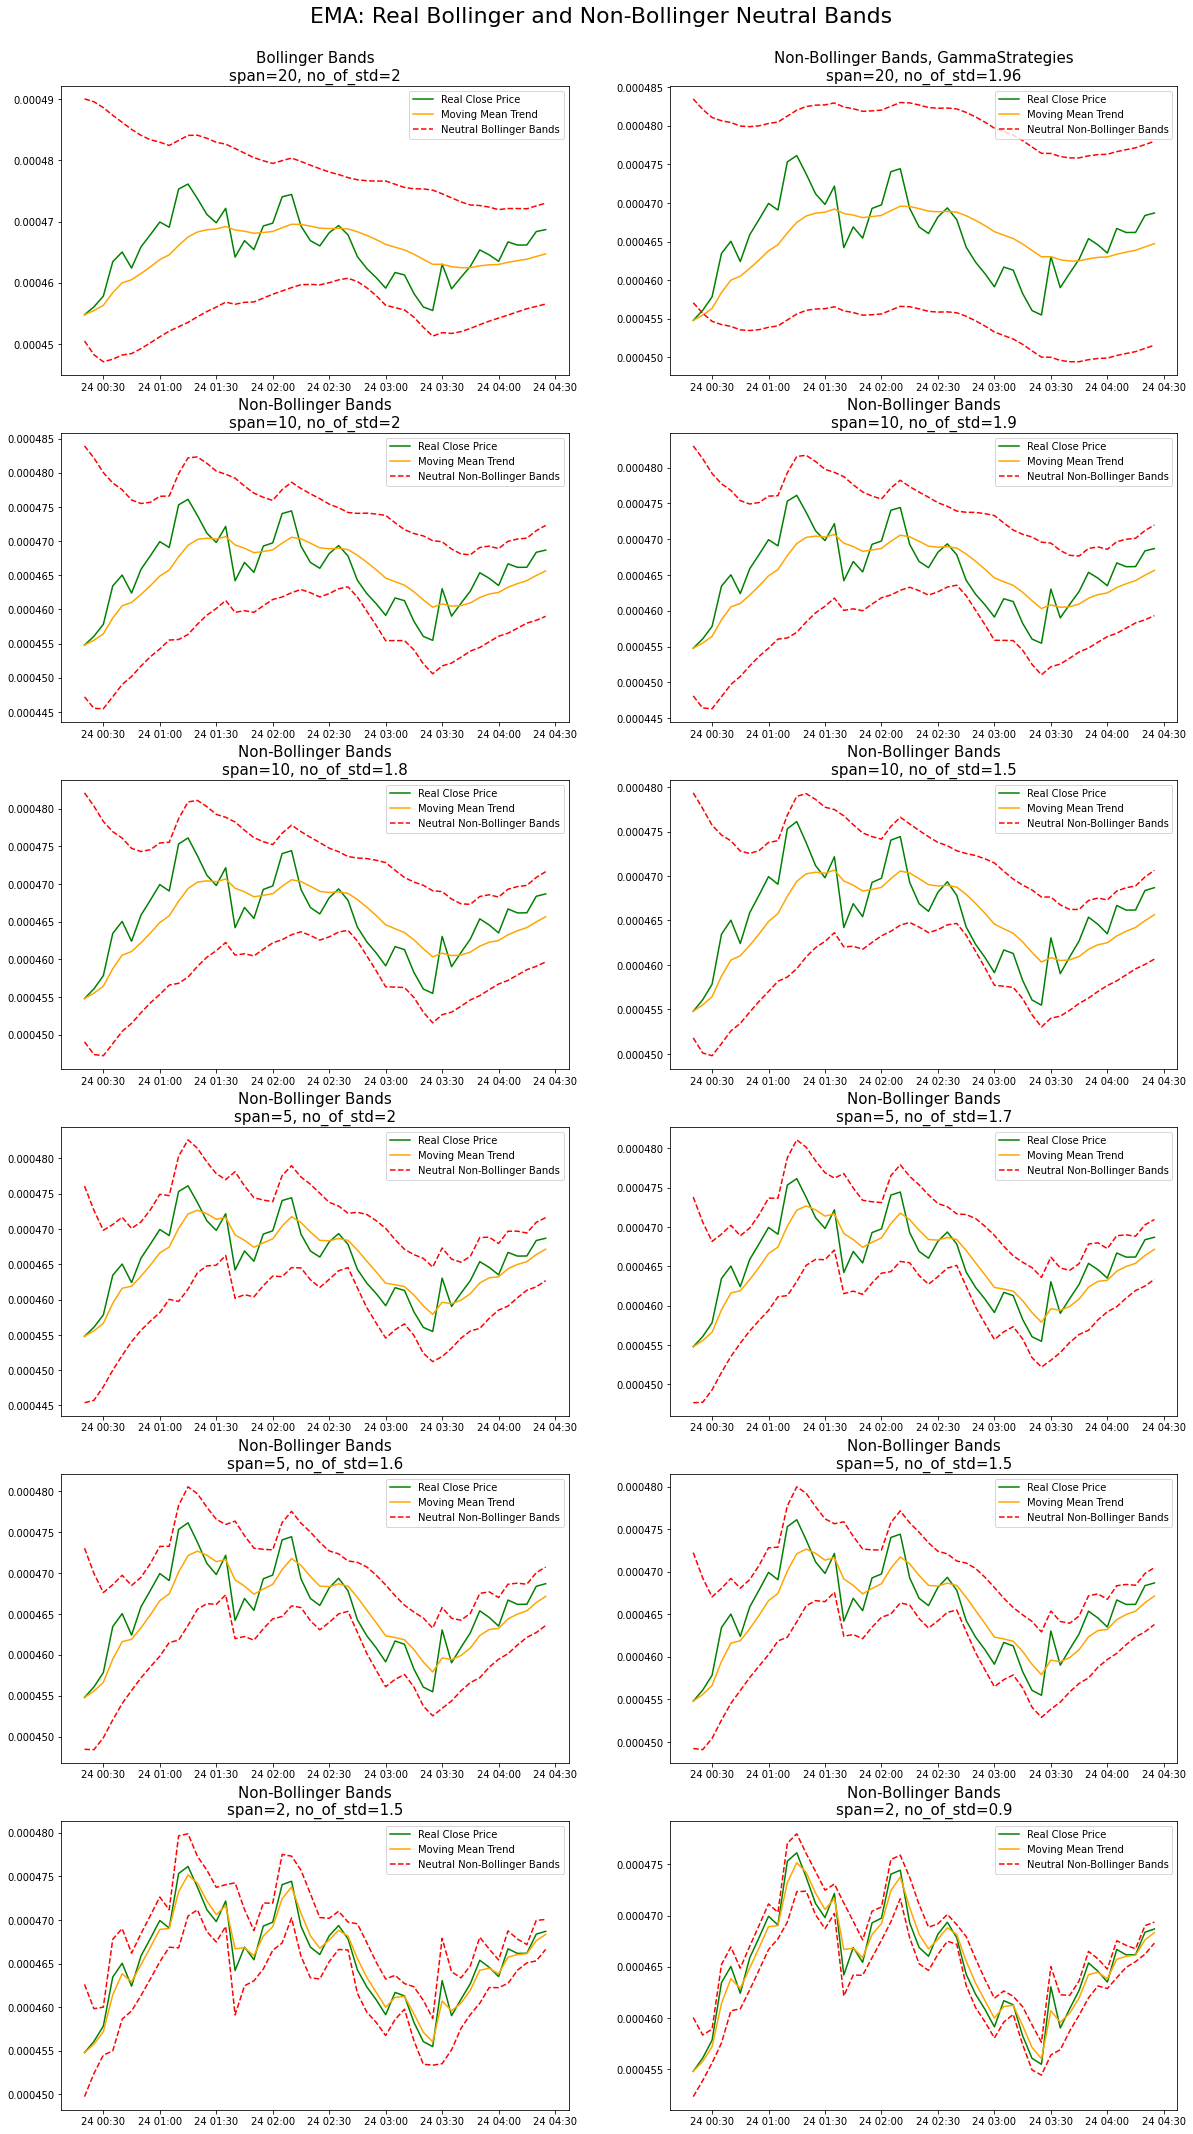

In [387]:
EMA_test=EMA_compare.copy()[-50:]
plt.figure(figsize=(20,50))

plt.subplot(8,2,1)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=20).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_1'], "r--", label="Neutral Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_1'], "r--")
plt.legend(loc= 'upper right')
plt.title('Bollinger Bands\nspan=20, no_of_std=2', fontsize=15)


plt.subplot(8,2,2)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=20).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_2'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_2'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands, GammaStrategies\nspan=20, no_of_std=1.96', fontsize=15)

plt.subplot(8,2,3)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=10).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_3'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_3'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nspan=10, no_of_std=2', fontsize=15)

plt.subplot(8,2,4)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=10).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_4'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_4'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nspan=10, no_of_std=1.9', fontsize=15)

plt.subplot(8,2,5)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=10).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_5'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_5'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nspan=10, no_of_std=1.8', fontsize=15)

plt.subplot(8,2,6)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=10).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_6'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_6'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nspan=10, no_of_std=1.5', fontsize=15)

plt.subplot(8,2,7)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=5).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_7'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_7'], "r--")
plt.legend(loc='upper right')
plt.title('Non-Bollinger Bands\nspan=5, no_of_std=2', fontsize=15)

plt.subplot(8,2,8)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=5).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_8'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_8'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nspan=5, no_of_std=1.7', fontsize=15)

plt.subplot(8,2,9)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=5).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_9'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_9'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nspan=5, no_of_std=1.6', fontsize=15)

plt.subplot(8,2,10)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=5).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_10'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_10'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nspan=5, no_of_std=1.5', fontsize=15)

plt.subplot(8,2,11)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=2).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_11'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_11'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nspan=2, no_of_std=1.5', fontsize=15)

plt.subplot(8,2,12)
plt.plot(EMA_test['close_price'], label="Real Close Price", color='g')
plt.plot(EMA_test['close_price'].ewm(span=2).mean(), label="Moving Mean Trend", color='orange')
plt.plot(EMA_test['neutral_lower_12'], "r--", label="Neutral Non-Bollinger Bands", color='r')
plt.plot(EMA_test['neutral_upper_12'], "r--")
plt.legend(loc= 'upper right')
plt.title('Non-Bollinger Bands\nspan=2, no_of_std=0.9', fontsize=15)

plt.suptitle('EMA: Real Bollinger and Non-Bollinger Neutral Bands',y=0.902,fontsize=22)
plt.show()

# Prediction of EMA Bollinger Bands (span=20, no_of_std=2)

In [347]:
def getEMABollingerBands (df):    
    # Calculate EMA & std
    EMA= df['close_price'].ewm(span=20).mean()
    std= df['close_price'].ewm(span=20).std()    
    # Calculate the upper and lower Bearish Bollinger Bands
    df['bearish_lower'] = (EMA - 1.5* 2 * std).abs()
    df['bearish_upper'] = EMA +  2 * std  
    # Calculate the upper and lower Neutral Bollinger Bands
    df['neutral_lower'] = (EMA - 2 * std).abs()
    df['neutral_upper'] = EMA + 2 * std
    # Calculate the upper and lower Bullish Bollinger Bands
    df['bullish_lower'] = (EMA - 2 * std).abs()
    df['bullish_upper'] = EMA + 1.5 * 2 * std
    
    df.dropna(inplace=True)
    
    
    df=df[['close_price','bearish_lower','bearish_upper','neutral_lower','neutral_upper','bullish_lower', 'bullish_upper']]
    return df

copied_data=data.copy()
data_bands=getEMABollingerBands (copied_data)


def train_test_split(df, test_size):
    split = df.shape[0] - int(test_size * df.shape[0])
    train_set = df.iloc[:split]
    test_set = df.iloc[split:]
    return train_set, test_set

train_set, test_set = train_test_split(data_bands, 0.3)


def zero_scaling(df):   
    return df / df.iloc[0] - 1


def sliding_window(df, len_window, zero):   
    window = []
    for a in range(df.shape[0] - len_window):
        sub = df[a: (a + len_window)].copy()
        if zero:
            sub = zero_scaling(sub)
        window.append(sub.values)
    return np.array(window)


def prepare_data(column, len_window, zero):     
    train_data = train_set[[column]]
    test_data = test_set[[column]]  
    
    X_train = sliding_window(train_data, len_window, zero)  
    X_test = sliding_window(test_data, len_window, zero) 
    
    y_train = train_data[column][len_window:].values
    y_test = test_data[column][len_window:].values
    
    if zero:
        y_train = y_train / train_data[column][:-len_window].values - 1
        y_test = y_test / test_data[column][:-len_window].values - 1
        
    return train_data,  test_data, X_train, X_test,  y_train, y_test



data_final_EMA_Bollinger= test_set.copy()

for col in test_set.columns:
    train_data,  test_data, X_train, X_test,  y_train, y_test = prepare_data(column=col, len_window=5, zero=True)
    
    model = Sequential()
    model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])) )  
    model.add(Dropout(0.2))
    model.add(Dense(units=1 ))  # tedade noroun ha
    model.add(Activation('linear'))  #activation ra besoorate layer joda add konim natije behtar ast
    model.compile(loss='mse', optimizer='adam') 
    
    model.fit(X_train,y_train,epochs=30,batch_size=32, verbose=1) 
    
    prediction=model.predict(X_test).squeeze()
    
    predicted= pd.DataFrame(data=(prediction + 1) * (test_data[col][:-5].values) ,  index=test_data[5:].index ,columns=['predicted_'+col] )            

    data_final_EMA_Bollinger= data_final_EMA_Bollinger.join(predicted)

data_final_EMA_Bollinger;

Epoch 1/30
209/209 [==============================] - 3s 6ms/step - loss: 6.7808e-05
Epoch 2/30
209/209 [==============================] - 1s 6ms/step - loss: 3.2987e-05
Epoch 3/30
209/209 [==============================] - 1s 6ms/step - loss: 3.0715e-05
Epoch 4/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9677e-05
Epoch 5/30
209/209 [==============================] - 1s 6ms/step - loss: 2.7748e-05
Epoch 6/30
209/209 [==============================] - 1s 6ms/step - loss: 2.8851e-05
Epoch 7/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9510e-05
Epoch 8/30
209/209 [==============================] - 1s 6ms/step - loss: 2.8306e-05
Epoch 9/30
209/209 [==============================] - 1s 6ms/step - loss: 2.7812e-05
Epoch 10/30
209/209 [==============================] - 1s 6ms/step - loss: 2.8839e-05
Epoch 11/30
209/209 [==============================] - 1s 6ms/step - loss: 2.7520e-05
Epoch 12/30
209/209 [==============================] - 1s 6ms/s

209/209 [==============================] - 1s 6ms/step - loss: 4.1272e-06
Epoch 12/30
209/209 [==============================] - 1s 6ms/step - loss: 3.4090e-06
Epoch 13/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9763e-06
Epoch 14/30
209/209 [==============================] - 1s 6ms/step - loss: 3.4911e-06
Epoch 15/30
209/209 [==============================] - 1s 6ms/step - loss: 3.6250e-06
Epoch 16/30
209/209 [==============================] - 1s 6ms/step - loss: 3.9931e-06
Epoch 17/30
209/209 [==============================] - 1s 7ms/step - loss: 3.5277e-06
Epoch 18/30
209/209 [==============================] - 1s 6ms/step - loss: 3.1133e-06
Epoch 19/30
209/209 [==============================] - 1s 6ms/step - loss: 3.0343e-06
Epoch 20/30
209/209 [==============================] - 1s 6ms/step - loss: 2.8370e-06
Epoch 21/30
209/209 [==============================] - 1s 6ms/step - loss: 4.2766e-06
Epoch 22/30
209/209 [==============================] - 1s 6ms/step

# Prediction of EMA Optimal NonBollinger Bands (span=2, no_of_std=0.9)

In [348]:
def getEMABollingerBands (df):    
    # Calculate EMA & std
    EMA= df['close_price'].ewm(span=2).mean()
    std= df['close_price'].ewm(span=2).std()    
    # Calculate the upper and lower Bearish Bollinger Bands
    df['bearish_lower'] = (EMA - 1.5* 0.9 * std).abs()
    df['bearish_upper'] = EMA +  0.9 * std  
    # Calculate the upper and lower Neutral Bollinger Bands
    df['neutral_lower'] = (EMA - 0.9 * std).abs()
    df['neutral_upper'] = EMA + 0.9 * std
    # Calculate the upper and lower Bullish Bollinger Bands
    df['bullish_lower'] = (EMA - 0.9 * std).abs()
    df['bullish_upper'] = EMA + 1.5 * 0.9 * std
    
    df.dropna(inplace=True)
    
    
    df=df[['close_price','bearish_lower','bearish_upper','neutral_lower','neutral_upper','bullish_lower', 'bullish_upper']]
    return df

copied_data=data.copy()
data_bands=getEMABollingerBands (copied_data)


def train_test_split(df, test_size):
    split = df.shape[0] - int(test_size * df.shape[0])
    train_set = df.iloc[:split]
    test_set = df.iloc[split:]
    return train_set, test_set

train_set, test_set = train_test_split(data_bands, 0.3)


def zero_scaling(df):   
    return df / df.iloc[0] - 1


def sliding_window(df, len_window, zero):   
    window = []
    for a in range(df.shape[0] - len_window):
        sub = df[a: (a + len_window)].copy()
        if zero:
            sub = zero_scaling(sub)
        window.append(sub.values)
    return np.array(window)


def prepare_data(column, len_window, zero):     
    train_data = train_set[[column]]
    test_data = test_set[[column]]  
    
    X_train = sliding_window(train_data, len_window, zero)  
    X_test = sliding_window(test_data, len_window, zero) 
    
    y_train = train_data[column][len_window:].values
    y_test = test_data[column][len_window:].values
    
    if zero:
        y_train = y_train / train_data[column][:-len_window].values - 1
        y_test = y_test / test_data[column][:-len_window].values - 1
        
    return train_data,  test_data, X_train, X_test,  y_train, y_test



data_final_EMA_Non_Bollinger= test_set.copy()

for col in test_set.columns:
    train_data,  test_data, X_train, X_test,  y_train, y_test = prepare_data(column=col, len_window=5, zero=True)
    
    model = Sequential()
    model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])) )  
    model.add(Dropout(0.2))
    model.add(Dense(units=1 ))  # tedade noroun ha
    model.add(Activation('linear'))  #activation ra besoorate layer joda add konim natije behtar ast
    model.compile(loss='mse', optimizer='adam') 
    
    model.fit(X_train,y_train,epochs=30,batch_size=32, verbose=1) 
    
    prediction=model.predict(X_test).squeeze()
        
    predicted= pd.DataFrame(data=(prediction + 1) * (test_data[col][:-5].values) ,  index=test_data[5:].index ,columns=['predicted_'+col] )            

    data_final_EMA_Non_Bollinger= data_final_EMA_Non_Bollinger.join(predicted)

data_final_EMA_Non_Bollinger;

Epoch 1/30
209/209 [==============================] - 3s 6ms/step - loss: 7.0652e-05
Epoch 2/30
209/209 [==============================] - 1s 5ms/step - loss: 3.1582e-05
Epoch 3/30
209/209 [==============================] - 1s 5ms/step - loss: 2.9885e-05
Epoch 4/30
209/209 [==============================] - 1s 5ms/step - loss: 2.9338e-05
Epoch 5/30
209/209 [==============================] - 1s 5ms/step - loss: 2.8709e-05
Epoch 6/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9957e-05
Epoch 7/30
209/209 [==============================] - 1s 6ms/step - loss: 2.7846e-05
Epoch 8/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9778e-05
Epoch 9/30
209/209 [==============================] - 1s 6ms/step - loss: 2.9767e-05
Epoch 10/30
209/209 [==============================] - 1s 6ms/step - loss: 3.1371e-05
Epoch 11/30
209/209 [==============================] - 1s 5ms/step - loss: 2.8636e-05
Epoch 12/30
209/209 [==============================] - 1s 5ms/s

209/209 [==============================] - 1s 5ms/step - loss: 2.1950e-05
Epoch 12/30
209/209 [==============================] - 1s 6ms/step - loss: 2.1558e-05
Epoch 13/30
209/209 [==============================] - 1s 6ms/step - loss: 2.3121e-05
Epoch 14/30
209/209 [==============================] - 1s 6ms/step - loss: 2.2872e-05
Epoch 15/30
209/209 [==============================] - 1s 6ms/step - loss: 2.3038e-05
Epoch 16/30
209/209 [==============================] - 1s 6ms/step - loss: 2.3959e-05
Epoch 17/30
209/209 [==============================] - 1s 6ms/step - loss: 2.1690e-05
Epoch 18/30
209/209 [==============================] - 1s 6ms/step - loss: 2.4067e-05
Epoch 19/30
209/209 [==============================] - 1s 5ms/step - loss: 2.1322e-05
Epoch 20/30
209/209 [==============================] - 1s 5ms/step - loss: 2.1557e-05
Epoch 21/30
209/209 [==============================] - 1s 6ms/step - loss: 2.1743e-05
Epoch 22/30
209/209 [==============================] - 1s 6ms/step

# Comparing the Predictions of EMA Bollinger (span=20, no_of_std=2) & Optimal Non-Bollinger (span=2, no_of_std=0.9)

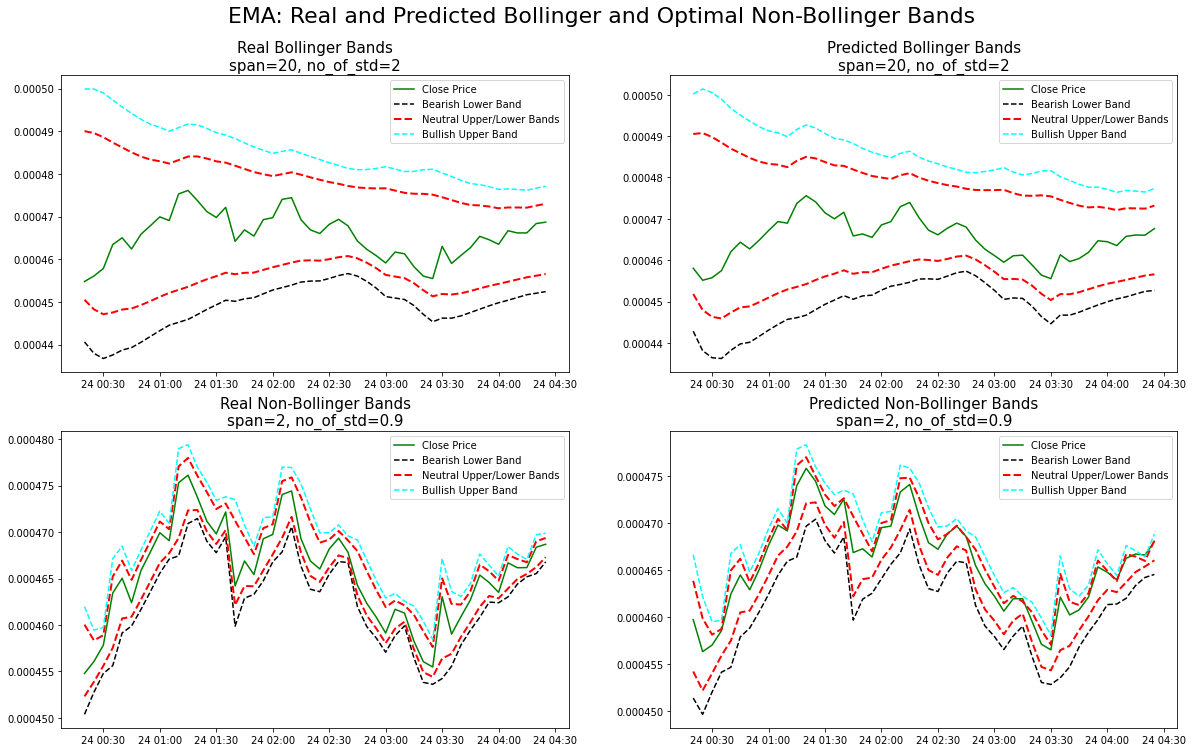

In [388]:
plt.figure(figsize=(20,12))

#EMA, Bollinger
test_EMA_Bollinger=data_final_EMA_Bollinger[-50:]
#Real
plt.subplot(2,2,1)
plt.plot(test_EMA_Bollinger['close_price'], label="Close Price", color='g')
plt.plot(test_EMA_Bollinger['bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_EMA_Bollinger['neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_EMA_Bollinger['neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r',lw=2)
plt.plot(test_EMA_Bollinger['bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend()
plt.title('Real Bollinger Bands\nspan=20, no_of_std=2', fontsize=15)
#Predicted
plt.subplot(2,2,2)
plt.plot(test_EMA_Bollinger['predicted_close_price'], label="Close Price", color='g' )
plt.plot(test_EMA_Bollinger['predicted_bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_EMA_Bollinger['predicted_neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_EMA_Bollinger['predicted_neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r', lw=2)
plt.plot(test_EMA_Bollinger['predicted_bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend()
plt.title('Predicted Bollinger Bands\nspan=20, no_of_std=2', fontsize=15)

#EMA, Non-Bollinger
test_EMA_Non_Bollinger=data_final_EMA_Non_Bollinger[-50:]
#Real
plt.subplot(2,2,3)
plt.plot(test_EMA_Non_Bollinger['close_price'], label="Close Price", color='g')
plt.plot(test_EMA_Non_Bollinger['bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_EMA_Non_Bollinger['neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_EMA_Non_Bollinger['neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r',lw=2)
plt.plot(test_EMA_Non_Bollinger['bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend()
plt.title('Real Non-Bollinger Bands\nspan=2, no_of_std=0.9', fontsize=15)
#Predicted
plt.subplot(2,2,4)
plt.plot(test_EMA_Non_Bollinger['predicted_close_price'], label="Close Price", color='g' )
plt.plot(test_EMA_Non_Bollinger['predicted_bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_EMA_Non_Bollinger['predicted_neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_EMA_Non_Bollinger['predicted_neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r', lw=2)
plt.plot(test_EMA_Non_Bollinger['predicted_bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend()
plt.title('Predicted Non-Bollinger Bands\nspan=2, no_of_std=0.9', fontsize=15)
plt.suptitle('EMA: Real and Predicted Bollinger and Optimal Non-Bollinger Bands',y=0.96,fontsize=22)

plt.show()

# Comparing the SMA Optimal Non-Bollinger  (window=2, no_of_std=1.8) & EMA Optimal Non-Bollinger (span=2, no_of_std=0.9)

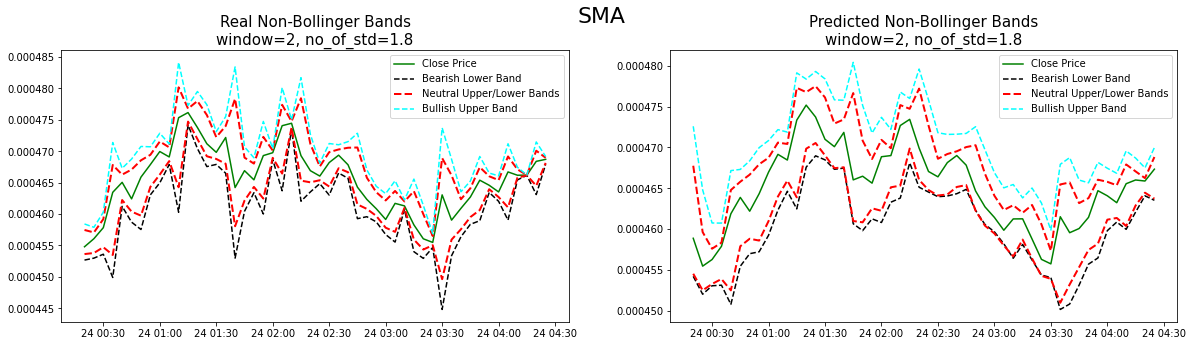

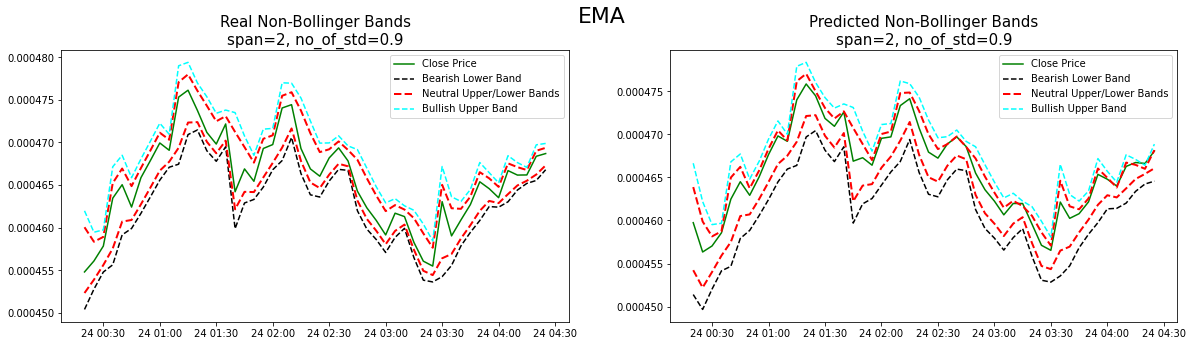

In [394]:
plt.figure(figsize=(20,5))
#SMA, Non-Bollinger
#Real
plt.subplot(1,2,1)
plt.plot(test_SMA_Non_Bollinger['close_price'], label="Close Price", color='g')
plt.plot(test_SMA_Non_Bollinger['bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_SMA_Non_Bollinger['neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_SMA_Non_Bollinger['neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r',lw=2)
plt.plot(test_SMA_Non_Bollinger['bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend(loc= 'upper right')
plt.title('Real Non-Bollinger Bands\nwindow=2, no_of_std=1.8', fontsize=15)
#Predicted
plt.subplot(1,2,2)
plt.plot(test_SMA_Non_Bollinger['predicted_close_price'], label="Close Price", color='g' )
plt.plot(test_SMA_Non_Bollinger['predicted_bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_SMA_Non_Bollinger['predicted_neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_SMA_Non_Bollinger['predicted_neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r', lw=2)
plt.plot(test_SMA_Non_Bollinger['predicted_bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend(loc= 'upper right')
plt.title('Predicted Non-Bollinger Bands\nwindow=2, no_of_std=1.8', fontsize=15)
plt.suptitle('SMA',y=1.0,fontsize=22)
plt.show()

plt.figure(figsize=(20,5))
#EMA, Non-Bollinger
#Real
plt.subplot(1,2,1)
plt.plot(test_EMA_Non_Bollinger['close_price'], label="Close Price", color='g')
plt.plot(test_EMA_Non_Bollinger['bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_EMA_Non_Bollinger['neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_EMA_Non_Bollinger['neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r',lw=2)
plt.plot(test_EMA_Non_Bollinger['bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend()
plt.title('Real Non-Bollinger Bands\nspan=2, no_of_std=0.9', fontsize=15)
#Predicted
plt.subplot(1,2,2)
plt.plot(test_EMA_Non_Bollinger['predicted_close_price'], label="Close Price", color='g' )
plt.plot(test_EMA_Non_Bollinger['predicted_bearish_lower'], "r--", label="Bearish Lower Band", color='black')
plt.plot(test_EMA_Non_Bollinger['predicted_neutral_lower'], "r--", color='r', lw=2)
plt.plot(test_EMA_Non_Bollinger['predicted_neutral_upper'], "r--", label="Neutral Upper/Lower Bands", color='r', lw=2)
plt.plot(test_EMA_Non_Bollinger['predicted_bullish_upper'], "r--", label="Bullish Upper Band", color='cyan')
plt.legend()
plt.title('Predicted Non-Bollinger Bands\nspan=2, no_of_std=0.9', fontsize=15)
plt.suptitle('EMA',y=1.0,fontsize=22)
plt.show()

# Conclusion

Based on the above results, the optimal Non-Bollinger bands predicted by implementing LSTM model on Expotential Moving Average data is narrower than the ones predicted for the optimal Simple Moving Average data.